In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# constant
DATASET_DIR = "datasets" + os.sep + "Gastrovision"
PREPROCESSED_DIR = "datasets" + os.sep + "preprocessed_Gastrovision"

### display the enhanced and the original image

In [4]:
def display_image(enhanced_image_path: str, original_image_path: str, class_name: str):
    try:
        enhanced_image_file = cv2.imread(enhanced_image_path)
        original_image_file = cv2.imread(original_image_path)
    except Exception as e:
        raise e
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    ax = axes.ravel()
    
    fig.suptitle(class_name)
    
    ax[0].imshow(original_image_file[:, :, ::-1])
    ax[0].set_title("original image", size=20)
    ax[0].axis("off")
    
    ax[1].imshow(enhanced_image_file)
    ax[1].set_title("enhanced image", size=20)
    ax[1].axis("off")
    
    plt.figure()
    plt.show()

### image enhancements algorithm

In [11]:
def clahe_enhance(image_file):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(src=image_file)
    
    return clahe_image

cv2.imread() returns the image in BGR values

In [13]:
# RGB color space
def rgb_enhance(image_path: str = ""):
    if image_path == "":
        raise Exception("Please provide the path of the image")

    image_file = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    assert image_file is not None, "file can't be opened"

    rgb_image = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
    
    # Normalize
    # rgb_enhanced = rgb_image / 255.0
    
    return rgb_image
    
# Grayscale color space
def grayscale_enhance(image_path: str = ""):
    if image_path == "":
        raise Exception("Please provide the path of the image")
    
    try:
        image_file = cv2.imread(image_path)
    except Exception as e:
        raise e
    
    # Simply convert RGB to Grayscale
    gray_image = cv2.cvtColor(image_file, cv2.COLOR_BGR2GRAY)
    
    # Normalize pixel values
    # normalized_image = gray_image // 255.0
    
    # CLAHE
    clahe_image = clahe_enhance(image_file)
    
    return gray_image

# HSV color space
def hsv_enhance(image_path: str = ""):
    if image_path == "":
        raise Exception("Please provide the path of the image")
    
    try:
        image_file = cv2.imread(image_path)
    except Exception as e:
        raise e
    
    # convert to HSV
    hsv_image = cv2.cvtColor(image_file, cv2.COLOR_BGR2HSV)
    
    return hsv_image

# HSI color space
def hsi_enhance(image_path: str = ""):
    if image_path == "":
        raise Exception("Please provide the path of the image")
    
    try:
        image_file = cv2.imread(image_path)
    except Exception as e:
        raise e
    
    hsi_image = cv2.cvtColor(image_file, cv2.COLOR_BGR2HLS)
    
    return hsi_image

# LAB color space
def lab_enhance(image_path: str = ""):
    if image_path == "":
        raise Exception("Please provide the path of the image")
    
    try:
        image_file = cv2.imread(image_path)
    except Exception as e:
        raise e
    
    lab_image = cv2.cvtColor(image_file, cv2.COLOR_BGR2LAB)
    
    return lab_image

# TXI Enhancements
def txi_enhance(image_path: str = ""):
    if image_path == "":
        raise Exception("Please provide the path of the image")
    
    try:
        image_file = cv2.imread(image_path)
    except Exception as e:
        raise e
    
# Single-Scale Retinex Algorithm
# Reference: https://github.com/aravindskrishnan/Retinex-Image-Enhancement/blob/master/retinex.py
def ssr_enhance(image_path: str = "", variance: int = 15):
    if image_path == "":
        raise Exception("Please provide the path of the image")
    
    try:
        image_file = cv2.imread(image_path)
    except Exception as e:
        raise e

    image_arr = np.float64(image_file) + 1.0
    image_retinex = np.log10(image_arr) - np.log10(cv2.GaussianBlur(image_arr, (0, 0), variance))

    for i in range(image_retinex.shape[2]):
        unique, count = np.unique(np.int32(image_retinex[:, :, i] * 100), return_counts=True)
        
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break
            
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0

        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.1:
                low_val = u / 100.0

            if u > 0 and c < zero_count * 0.1:
                high_val = u / 100.0
                break
            
        image_retinex[:, :, i] = np.maximum(np.minimum(image_retinex[:, :, i], high_val), low_val)
        image_retinex[:, :, i] = (image_retinex[:, :, i] - np.min(image_retinex[:, :, i])) / (np.max(image_retinex[:, :, i]) - np.min(image_retinex[:, :, i]))
        image_retinex[:, :, i] = image_retinex[:, :, i] * 255
        
    image_retinex = np.uint8(image_retinex)

    return image_retinex

In [7]:
image_classes = os.listdir(DATASET_DIR)

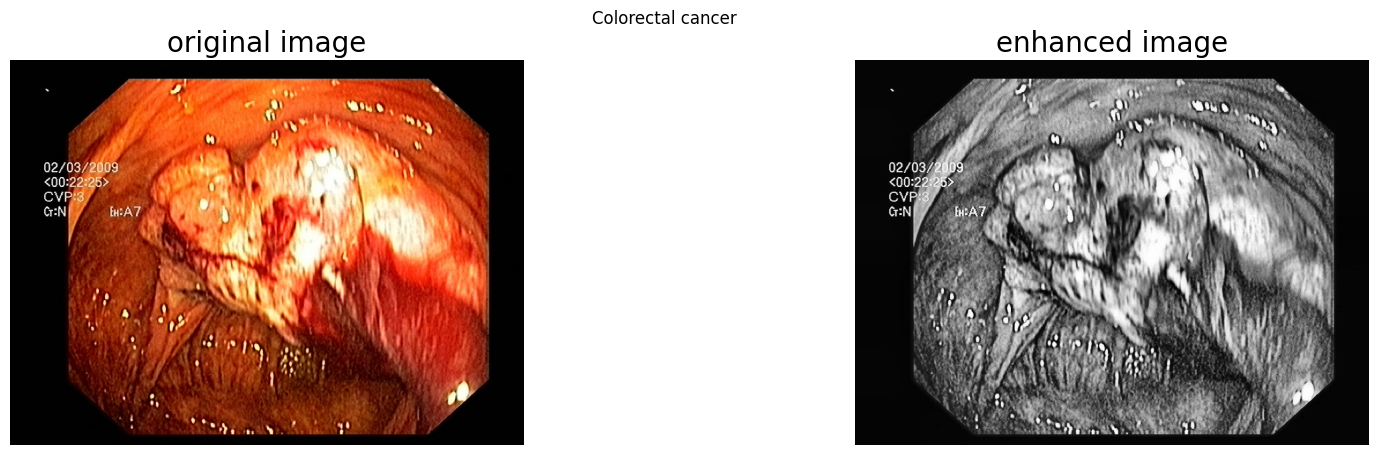

<Figure size 640x480 with 0 Axes>

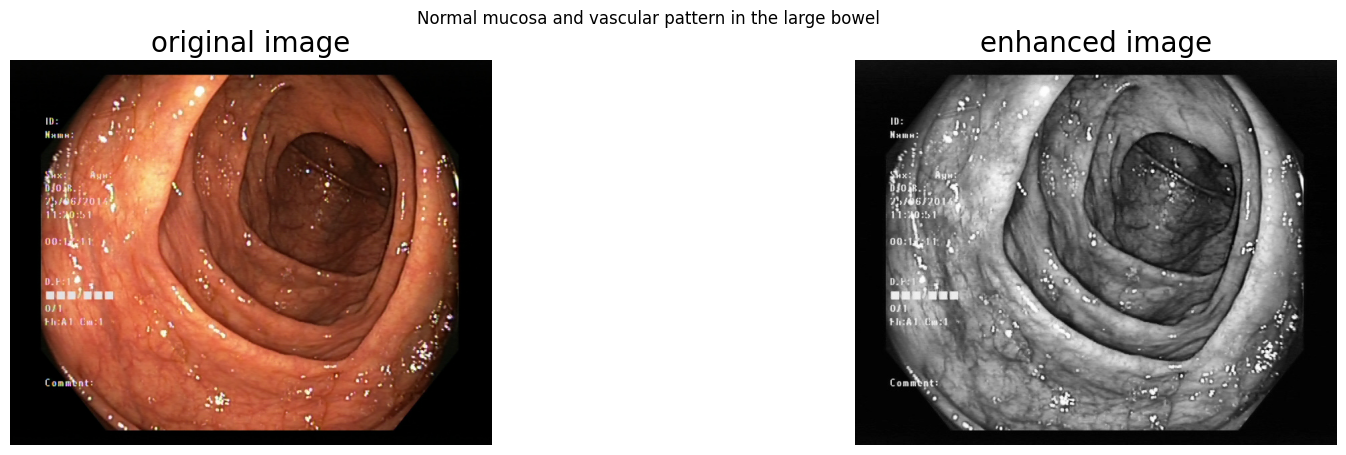

<Figure size 640x480 with 0 Axes>

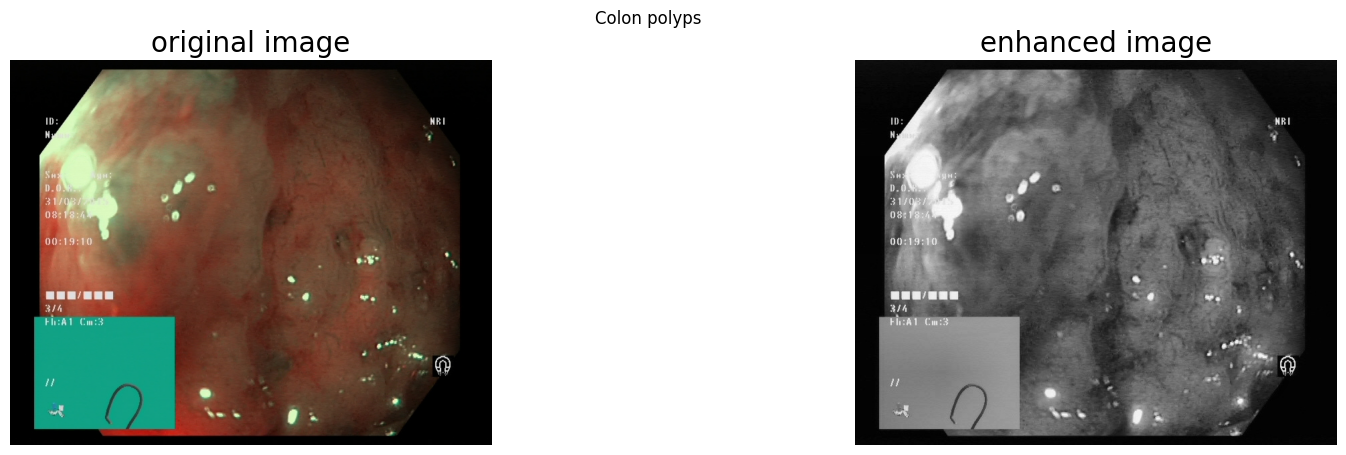

<Figure size 640x480 with 0 Axes>

In [14]:
for image_class in image_classes:
    image_class_dir = DATASET_DIR + os.sep + image_class
    preprocessed_image_class_dir = PREPROCESSED_DIR + os.sep + image_class
    
    for file in os.listdir(image_class_dir):
        file_full_path = image_class_dir + os.sep + file
        enhanced_image = rgb_enhance(file_full_path)
        
        cv2.imwrite(file, enhanced_image)
        
        display_image(file, file_full_path, image_class)

        break